In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import spacy
import textacy
import gc
from glob import glob
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline
plt.rcParams['figure.figsize'] = (24,12)
plt.style.use('ggplot')

In [2]:
nlp = spacy.load('en')

In [2]:
filenames = glob('text/*')
texts = [open(text).read() for text in filenames]
metadata = [{'filename': fn} for fn in filenames]

In [3]:
james = textacy.Corpus('en', texts, metadatas=metadata)

In [4]:
james.save('.', 'james', compression='gzip')

In [2]:
james = textacy.Corpus.load('.', 'james', compression='gzip')

In [6]:
allSents = []
for doc in james:
    for sent in doc.sents:
        allSents.append((sent, len(sent), doc.metadata['filename']))

In [7]:
def splitSents(n):
    a, b = [], []
    for sent in allSents:
        if sent[1] < n:
            a.append(sent)
        if sent[1] >= n: 
            b.append(sent)
    return a, b

def countWords(sentList):
    return sum([sent[1] for sent in sentList])    

In [48]:
short, long = splitSents(100)


In [49]:
# countWords(short), countWords(long)

In [50]:
def randomSent(sents):
    return sents[np.random.choice(range(len(short)))]

In [10]:
# Randomly sample from short sentences until we get
# the same wordcount as in long.
shortSample = [randomSent(short)]
print(shortSample)
while countWords(shortSample) < countWords(long): 
    print('\r', countWords(shortSample), end='')
    shortSample.append(randomSent(short))

[(The resentment was rather Delia’s, but she kept it to herself, for
she was capable of reflecting with complacency that the key of the
house would after all be hers, so that she could open the door for the
Proberts if the Proberts should knock., 53, 'text/1888-reverberator.txt')]
 10565637953537087970

In [51]:
def makeSoup(sentList):
    justSents = [sent[0] for sent in sentList]
    stringSoup = " ".join([sent.string for sent in justSents])
    return stringSoup

In [ ]:
# Try to free up some memory.
james = ""
gc.collect()

In [11]:
short = shortSample

In [52]:
shortSoup = makeSoup(short)
longSoup = makeSoup(long)

In [53]:
shortDoc = textacy.Doc(shortSoup)
longDoc = textacy.Doc(longSoup)

In [13]:
def bag(doc):
    return pd.Series(doc.to_bag_of_terms(lemmatize=True, as_strings=True, weighting='freq', filter_punct=True))

In [ ]:
df = pd.DataFrame([bag(shortDoc), bag(longDoc)], index=['short', 'long'])

In [ ]:
df = df.fillna(0)

In [ ]:
trial3 = (df.loc['short'] - df.loc['long']).sort_values()

In [ ]:
trial1 = (df.loc['short'] - df.loc['long']).sort_values()

In [ ]:
trial2 = (df.loc['short'] - df.loc['long']).sort_values()

In [ ]:
trials = pd.DataFrame([trial1, trial2, trial3])

In [ ]:
trials.mean().sort_values()

In [ ]:
def POSRepresentation(text): 
    return pd.Series([w.tag_ for w in text.spacy_doc])

In [ ]:
shortPOS = POSRepresentation(shortDoc)
longPOS = POSRepresentation(longDoc)

In [ ]:
POSs = pd.DataFrame([shortPOS.value_counts(), longPOS.value_counts()], index=['short', 'long'])

In [ ]:
POSs

In [ ]:
(POSs.loc['short'] - POSs.loc['long']).plot(kind='bar')

In [ ]:
POSs.columns[6]

In [20]:
s = short[1][0]
l = long[0][0]

In [25]:
s.start_char

37

In [34]:
short[1][0].start

12

In [54]:
shortStarts = [s[0].start/len(s[0].doc) for s in short]
longStarts = [s[0].start/len(s[0].doc) for s in long]

In [ ]:
bins = np.histogram(shortStarts + longStarts)[1]

In [38]:
pd.Series(shortStarts).median()

0.5163051112761132

In [39]:
pd.Series(longStarts).median()

0.4870612420652008

In [55]:
pd.Series(shortStarts).describe(), pd.Series(longStarts).describe()

(count    131748.000000
 mean          0.508944
 std           0.288942
 min           0.000000
 25%           0.260766
 50%           0.511085
 75%           0.759665
 max           0.999948
 dtype: float64, count    862.000000
 mean       0.459044
 std        0.291024
 min        0.000188
 25%        0.203791
 50%        0.422530
 75%        0.703305
 max        0.998756
 dtype: float64)

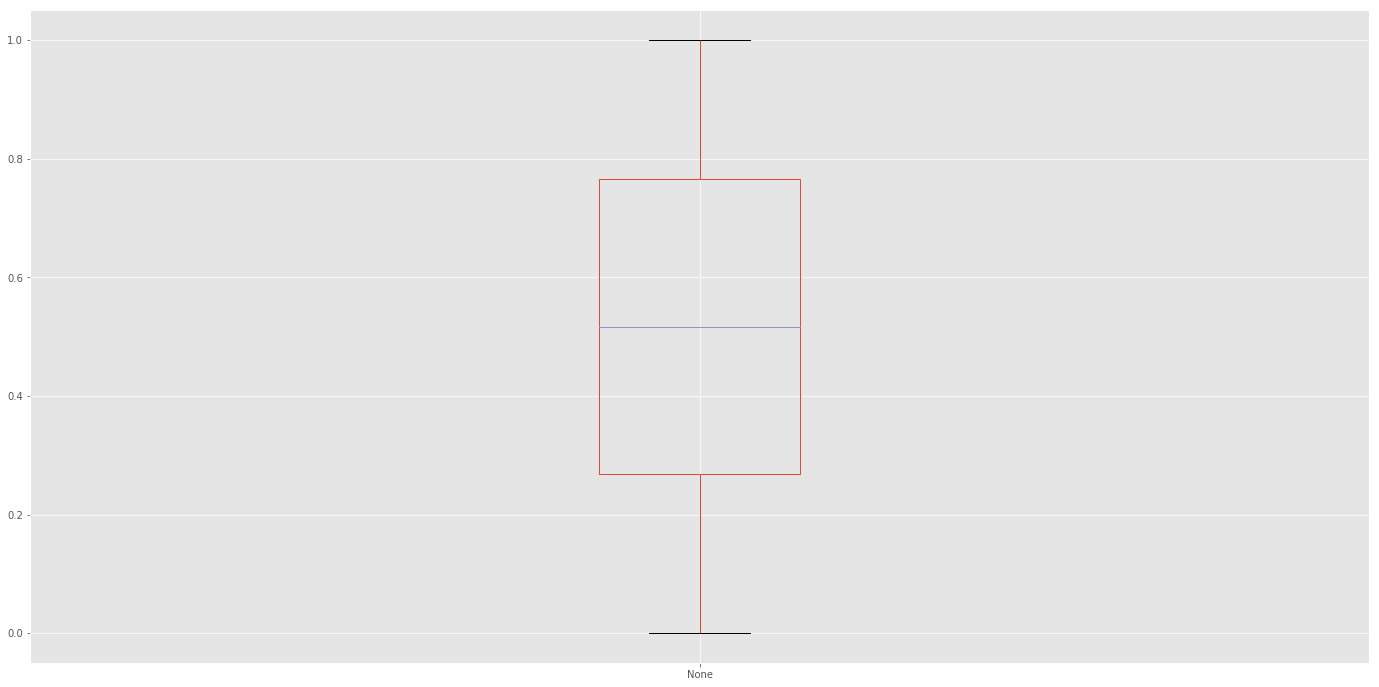

In [47]:
pd.Series(shortStarts).plot(kind='box')

In [43]:
pd.DataFrame({'short': shortStarts, 'long': longStarts}).plot(kind='box')

ValueError: arrays must all be same length

# Probabilities

In [56]:
len(short)

131748

In [57]:
shortProbs = [w.prob for sent in short for w in sent[0]]
longProbs = [w.prob for sent in long for w in sent[0]]

In [58]:
pd.Series(shortProbs).describe()

count    3.107423e+06
mean    -7.675394e+00
std      4.530200e+00
min     -1.957931e+01
25%     -8.840848e+00
50%     -6.282995e+00
75%     -4.547973e+00
max     -3.072948e+00
dtype: float64

In [59]:
pd.Series(longProbs).describe()

count    103867.000000
mean         -7.922938
std           4.823603
min         -19.579313
25%          -9.263999
50%          -6.282995
75%          -4.506450
max          -3.072948
dtype: float64

In [ ]:
shortProbs[:10]

In [ ]:
longProbs[:10]

In [16]:
shortDoc.spacy_doc.similarity(longDoc.spacy_doc)

0.99315724181061438